## Importing libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



In [6]:
dataset = pd.read_csv("/content/loans_new.csv", low_memory=False)

In [7]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Unnamed: 115,Unnamed: 116
0,1077501,1296599,5000,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN


## All the features and Targets

In [8]:
dataset.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

## To find the repeated rows and the number of NAN values in each column

In [9]:
print(any(dataset.duplicated()) )
print(dataset.isnull().sum(axis = 0))

False
id                                0
member_id                         3
loan_amnt                         3
funded_amnt                       4
funded_amnt_inv                   4
                              ...  
total_bal_ex_mort             42540
total_bc_limit                42540
total_il_high_credit_limit    42540
Unnamed: 115                  42539
Unnamed: 116                  42539
Length: 117, dtype: int64


In [10]:
dataset.shape #checking the shape of the dataset

(42540, 117)

## Removing the columns having NAN values more than 50%

In [11]:
half_count = len(dataset) / 2
dataset = dataset.dropna(thresh=half_count,axis=1)

In [12]:
dataset.shape #checking the shape of the dataset

(42540, 58)

In [13]:
dataset.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

## Dropping the Redundant columns in the first pass

In [14]:
drop_list=['title','url','desc','id','member_id','funded_amnt','funded_amnt_inv','int_rate','sub_grade','emp_title','issue_d','zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt']
dataset = dataset.drop(drop_list,axis=1)

In [15]:
dataset

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,36 months,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,FALSE,...,744.0,740.0,FALSE,True,INDIVIDUAL,False,False,0.0,0.0,False
1,2500,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,FALSE,...,499.0,0.0,FALSE,True,INDIVIDUAL,False,False,0.0,0.0,False
2,2400,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,FALSE,...,719.0,715.0,FALSE,True,INDIVIDUAL,False,False,0.0,0.0,False
3,10000,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,FALSE,...,604.0,600.0,FALSE,True,INDIVIDUAL,False,False,0.0,0.0,False
4,3000,60 months,67.79,B,1 year,RENT,80000.0,Source Verified,Current,FALSE,...,694.0,690.0,FALSE,True,INDIVIDUAL,False,False,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42535,2525,36 months,80.69,B,< 1 year,RENT,110000.0,Not Verified,Does not meet the credit policy. Status:Fully ...,FALSE,...,714.0,710.0,NaN,True,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42536,6500,36 months,204.84,A,< 1 year,NONE,NaN,Not Verified,Does not meet the credit policy. Status:Fully ...,FALSE,...,724.0,720.0,NaN,True,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42537,5000,36 months,156.11,A,10+ years,MORTGAGE,70000.0,Not Verified,Does not meet the credit policy. Status:Fully ...,FALSE,...,794.0,790.0,NaN,True,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Took the Loan_status as the target

In [16]:
dataset = dataset[(dataset["loan_status"] == "Fully Paid") |(dataset["loan_status"] == "Charged Off")]
mapping_dictionary = {"l|oan_status":{ "Fully Paid": 1, "Charged Off": 0}}
dataset = dataset.replace(mapping_dictionary)

In [17]:
dataset

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,36 months,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,FALSE,...,744.0,740.0,FALSE,True,INDIVIDUAL,False,False,0.0,0.0,False
1,2500,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,FALSE,...,499.0,0.0,FALSE,True,INDIVIDUAL,False,False,0.0,0.0,False
2,2400,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,FALSE,...,719.0,715.0,FALSE,True,INDIVIDUAL,False,False,0.0,0.0,False
3,10000,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,FALSE,...,604.0,600.0,FALSE,True,INDIVIDUAL,False,False,0.0,0.0,False
5,5000,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,Fully Paid,FALSE,...,679.0,675.0,FALSE,True,INDIVIDUAL,False,False,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39783,2500,36 months,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Fully Paid,FALSE,...,809.0,805.0,NaN,True,INDIVIDUAL,False,NaN,0.0,NaN,NaN
39784,8500,36 months,275.38,C,3 years,RENT,18000.0,Not Verified,Fully Paid,FALSE,...,639.0,635.0,NaN,True,INDIVIDUAL,False,NaN,0.0,NaN,NaN
39785,5000,36 months,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Fully Paid,FALSE,...,744.0,740.0,NaN,True,INDIVIDUAL,False,NaN,0.0,NaN,NaN
39786,5000,36 months,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Fully Paid,FALSE,...,814.0,810.0,NaN,True,INDIVIDUAL,False,NaN,0.0,NaN,NaN


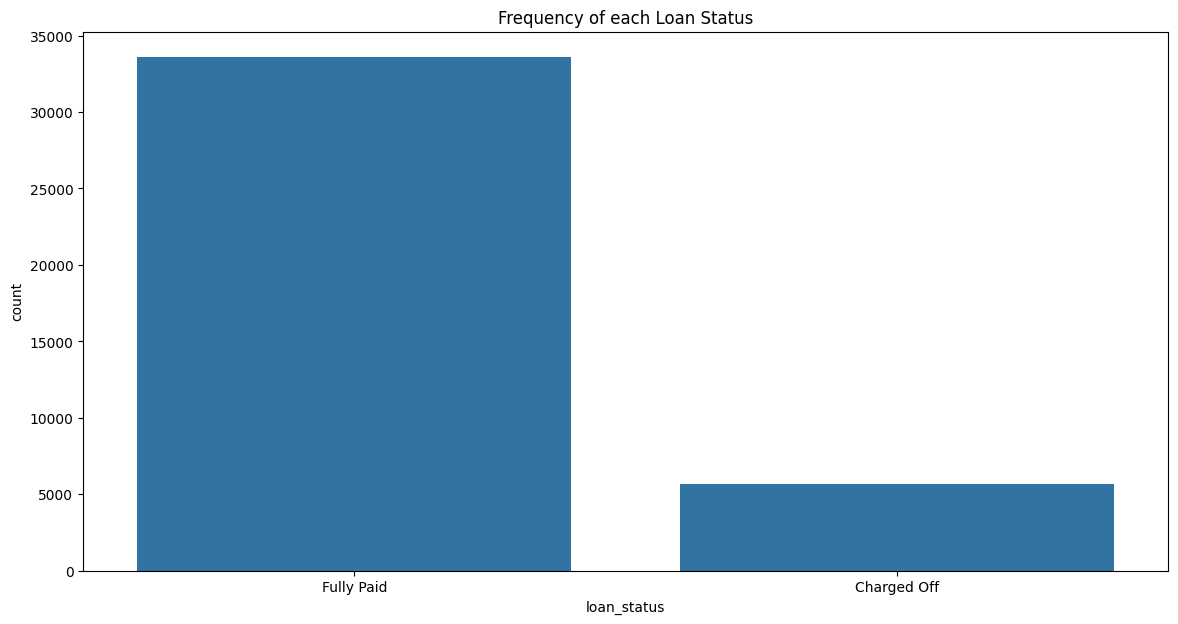

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(x='loan_status', data=dataset, ax=ax)
ax.set_title("Frequency of each Loan Status")
plt.show()


In [19]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]  #Remove columns with the same values

## Outlayers

In [20]:
for col in dataset.columns:
 if (len(dataset[col].unique()) < 4):
	 print(dataset[col].value_counts())

term
 36 months    29096
 60 months    10143
Name: count, dtype: int64
verification_status
Not Verified       16845
Verified           12526
Source Verified     9868
Name: count, dtype: int64
loan_status
Fully Paid     33586
Charged Off     5653
Name: count, dtype: int64
pymnt_plan
FALSE    39238
TRUE         1
Name: count, dtype: int64
collections_12_mths_ex_med
FALSE     39181
Nov-11        1
Name: count, dtype: int64
application_type
INDIVIDUAL    39237
Nov-11            1
Name: count, dtype: int64


## So we can remove pymnt_plan, collections_12_mths_ex_med, application_type

In [21]:
# Check if the columns exist in the dataset
print(dataset.columns)

# If the columns exist, display their value counts
if all(column in dataset.columns for column in ['pymnt_plan', 'collections_12_mths_ex_med', 'application_type']):
    print(dataset[['pymnt_plan', 'collections_12_mths_ex_med', 'application_type']].value_counts())
else:
    print("One or more columns do not exist in the dataset.")

# Drop the columns if they exist
columns_to_drop = ['pymnt_plan', 'collections_12_mths_ex_med', 'application_type']
dataset = dataset.drop(columns=[col for col in columns_to_drop if col in dataset.columns], axis=1)



Index(['loan_amnt', 'term', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'application_type',
       'pub_rec_bankruptcies'],
      dtype='object')
pymnt_plan  collections_12_mths_ex_med  application_type
FALSE       FALSE                       INDIVIDUAL          39180
            Nov-11                      Nov-11                  1
TRUE        FALSE                       INDIVIDUAL              1
Name: count, dtype: int64


In [22]:
dataset

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies
0,5000,36 months,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,...,1,3,0.0,13648,0.837,9.0,Sep-16,744.0,740.0,0.0
1,2500,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,...,5,3,0.0,1687,0.094,4.0,Sep-16,499.0,0.0,0.0
2,2400,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,...,2,2,0.0,2956,0.985,10.0,Sep-16,719.0,715.0,0.0
3,10000,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,...,1,10,0.0,5598,0.21,37.0,Apr-16,604.0,600.0,0.0
5,5000,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,...,3,9,0.0,7963,0.283,12.0,Jan-16,679.0,675.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39783,2500,36 months,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,...,0,13,0.0,7274,0.131,40.0,Jun-10,809.0,805.0,NaN
39784,8500,36 months,275.38,C,3 years,RENT,18000.0,Not Verified,Fully Paid,credit_card,...,1,6,0.0,8847,0.269,9.0,Jul-10,639.0,635.0,NaN
39785,5000,36 months,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,...,0,11,0.0,9698,0.194,20.0,Jun-07,744.0,740.0,NaN
39786,5000,36 months,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Fully Paid,other,...,0,17,0.0,85607,0.007,26.0,Jun-07,814.0,810.0,NaN


## Label encoding the columns with string datatype

In [23]:
label_encoder = LabelEncoder()

for column in dataset.columns:
    if dataset[column].dtype == 'object':  # Checking for string columns
        dataset[column] = label_encoder.fit_transform(dataset[column])


In [24]:
dataset

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies
0,676,0,162.87,1,1,4,24000.0,2,1,2,...,1,21,0.0,3217,924,9.0,110,744.0,740.0,0.0
1,482,1,59.83,2,10,4,30000.0,1,0,1,...,5,21,0.0,5562,122,4.0,110,499.0,0.0,0.0
2,460,0,84.33,2,1,4,12252.0,0,1,12,...,2,10,0.0,11523,1074,10.0,110,719.0,715.0,0.0
3,1,0,339.31,2,1,4,49200.0,1,1,10,...,1,0,0.0,16678,250,37.0,8,604.0,600.0,0.0
5,676,0,156.46,0,3,4,36000.0,1,1,14,...,3,39,0.0,19489,336,12.0,45,679.0,675.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39783,482,0,78.42,0,4,0,110000.0,0,1,5,...,0,3,0.0,18740,165,40.0,59,809.0,805.0,NaN
39784,817,0,275.38,2,3,4,18000.0,0,1,2,...,1,36,0.0,20390,321,9.0,49,639.0,635.0,NaN
39785,676,0,156.84,0,10,0,100000.0,0,1,3,...,0,1,0.0,21237,234,20.0,56,744.0,740.0,NaN
39786,676,0,155.38,0,10,0,200000.0,0,1,10,...,0,7,0.0,20100,16,26.0,56,814.0,810.0,NaN


## Outlayers

In [25]:
print(dataset.isnull().sum(axis = 0))

loan_amnt                 0
term                      0
installment               0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
fico_range_low            0
fico_range_high           0
inq_last_6mths            0
open_acc                  0
pub_rec                   1
revol_bal                 0
revol_util                0
total_acc                 2
last_credit_pull_d        0
last_fico_range_high      1
last_fico_range_low       1
pub_rec_bankruptcies    699
dtype: int64


In [26]:
#as pub_rec_bankruptcies as a good number of nan values, we can remove it
dataset = dataset.drop('pub_rec_bankruptcies',axis=1)

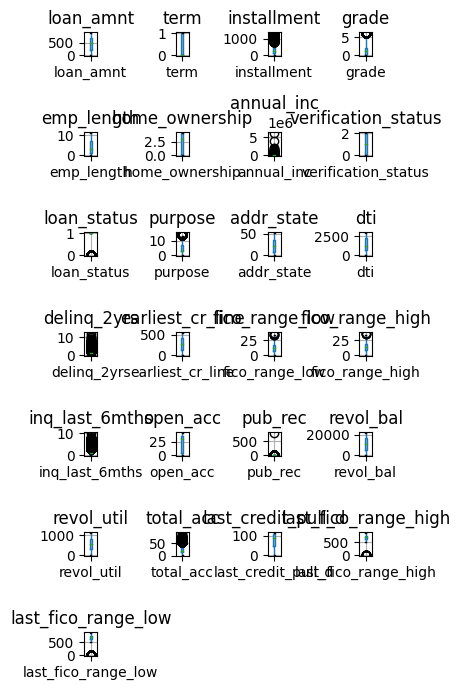

In [27]:
num_rows = 7  # You can change this as needed
num_cols = (len(dataset.columns) + num_rows - 1) // num_rows

# Create a grid of plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(4, 7))

# Flatten the axes if it's not already flattened
axes = axes.flatten()

for i, column in enumerate(dataset.columns):
    dataset.boxplot(column=[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_ylabel('')
for i in range(len(dataset.columns), num_rows * num_cols):
    fig.delaxes(axes[i])
plt.tight_layout()

# Outlayers should be removed

In [28]:
q1 = dataset["annual_inc"].quantile(0.25)
q2 = dataset["annual_inc"].quantile(0.75)
iql = q2-q1
upper_lmt = q2+iql*(1.5)
lower_lmt = q1-iql*(1.5)
dataset=dataset[(dataset["annual_inc"]>lower_lmt)&(dataset["annual_inc"]<upper_lmt)]


## Applying Feature Selection

<Axes: >

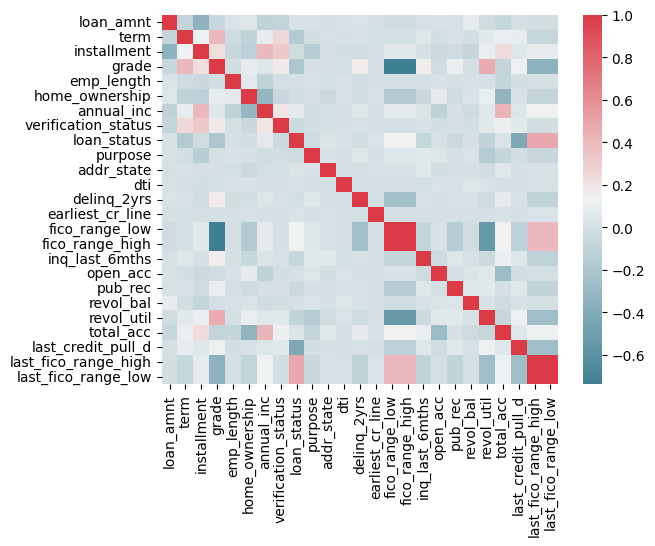

In [29]:
Correlation = dataset.corr(method="spearman")
sns.heatmap(Correlation, cmap=sns.diverging_palette(220, 10, as_cmap=True),
xticklabels= Correlation.columns.values, yticklabels= Correlation.columns.values)

In [30]:
corelation_matrix = dataset.corr()
high_corr = np.where(corelation_matrix > 0.7)
high_corr = [(corelation_matrix.index[x], corelation_matrix.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
print(high_corr)

[('fico_range_low', 'fico_range_high'), ('last_fico_range_high', 'last_fico_range_low')]


In [31]:
dataset = dataset.drop(['fico_range_high', 'last_fico_range_high'], axis=1)

## Feature Scaling

In [32]:
columns_to_scale = ['loan_amnt', 'installment', 'annual_inc', 'dti']
scaler = StandardScaler()
scaler.fit(dataset[columns_to_scale])
scaled_columns = scaler.transform(dataset[columns_to_scale])
dataset[columns_to_scale] = scaled_columns
print(dataset)

       loan_amnt  term  installment  grade  emp_length  home_ownership  \
0       0.825493     0    -0.752978      1           1               4   
1       0.126938     1    -1.269652      2          10               4   
2       0.047721     0    -1.146801      2           1               4   
3      -1.605046     0     0.131746      2           1               4   
5       0.825493     0    -0.785119      0           3               4   
...          ...   ...          ...    ...         ...             ...   
39782   0.825493     0    -0.775893      1           5               0   
39783   0.126938     0    -1.176436      0           4               0   
39784   1.333206     0    -0.188819      2           3               4   
39785   0.825493     0    -0.783214      0          10               0   
39787   1.192775     0    -0.288854      4          10               3   

       annual_inc  verification_status  loan_status  purpose  ...  \
0       -1.325493                    2    

In [33]:
dataset.dtypes

loan_amnt              float64
term                     int64
installment            float64
grade                    int64
emp_length               int64
home_ownership           int64
annual_inc             float64
verification_status      int64
loan_status              int64
purpose                  int64
addr_state               int64
dti                    float64
delinq_2yrs              int64
earliest_cr_line         int64
fico_range_low           int64
inq_last_6mths           int64
open_acc                 int64
pub_rec                float64
revol_bal                int64
revol_util               int64
total_acc              float64
last_credit_pull_d       int64
last_fico_range_low    float64
dtype: object

In [34]:
dataset

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,earliest_cr_line,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,last_fico_range_low
0,0.825493,0,-0.752978,1,1,4,-1.325493,2,1,2,...,200,17,1,21,0.0,3217,924,9.0,110,740.0
1,0.126938,1,-1.269652,2,10,4,-1.111347,1,0,1,...,42,18,5,21,0.0,5562,122,4.0,110,0.0
2,0.047721,0,-1.146801,2,1,4,-1.744793,0,1,12,...,387,17,2,10,0.0,11523,1074,10.0,110,715.0
3,-1.605046,0,0.131746,2,1,4,-0.426076,1,1,10,...,169,8,1,0,0.0,16678,250,37.0,8,600.0
5,0.825493,0,-0.785119,0,3,4,-0.897200,1,1,14,...,390,16,3,39,0.0,19489,336,12.0,45,675.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39782,0.825493,0,-0.775893,1,5,0,0.494755,0,1,2,...,380,21,0,0,0.0,17952,273,29.0,90,550.0
39783,0.126938,0,-1.176436,0,4,0,1.743945,0,1,5,...,423,22,0,3,0.0,18740,165,40.0,59,805.0
39784,1.333206,0,-0.188819,2,3,4,-1.539640,0,1,2,...,115,8,1,36,0.0,20390,321,9.0,49,635.0
39785,0.825493,0,-0.783214,0,10,0,1.387034,0,1,3,...,477,18,0,1,0.0,21237,234,20.0,56,740.0


## Use medians to fill the NAN data

In [35]:
medians = dataset.median()
dataset.fillna(medians, inplace=True)


In [36]:
dataset['loan_status'].value_counts()

loan_status
1    31909
0     5454
Name: count, dtype: int64

# Problem 2 - Creating ANN Model


In [37]:
X = dataset.drop('loan_status', axis=1)
y = dataset['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
X_train.shape

(29890, 22)

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(16, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))


In [42]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [43]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/10
935/935 [==============================] - 6s 4ms/step - loss: 0.2500 - accuracy: 0.8883 - val_loss: 0.2101 - val_accuracy: 0.9045
Epoch 2/10
935/935 [==============================] - 3s 3ms/step - loss: 0.2033 - accuracy: 0.9104 - val_loss: 0.2027 - val_accuracy: 0.9079
Epoch 3/10
935/935 [==============================] - 3s 3ms/step - loss: 0.1954 - accuracy: 0.9139 - val_loss: 0.2018 - val_accuracy: 0.9082
Epoch 4/10
935/935 [==============================] - 3s 3ms/step - loss: 0.1906 - accuracy: 0.9167 - val_loss: 0.1980 - val_accuracy: 0.9118
Epoch 5/10
935/935 [==============================] - 3s 3ms/step - loss: 0.1865 - accuracy: 0.9174 - val_loss: 0.1963 - val_accuracy: 0.9126
Epoch 6/10
935/935 [==============================] - 4s 5ms/step - loss: 0.1828 - accuracy: 0.9203 - val_loss: 0.1969 - val_accuracy: 0.9115
Epoch 7/10
935/935 [==============================] - 2s 3ms/step - loss: 0.1806 - accuracy: 0.9200 - val_loss: 0.1983 - val_accuracy: 0.9126
Epoch 

In [44]:
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

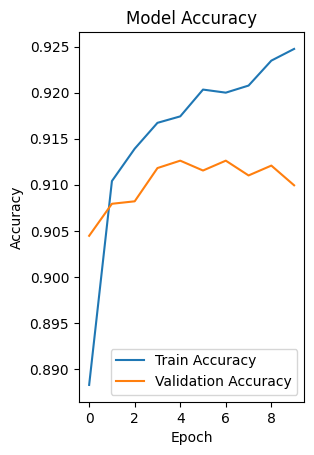

In [45]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

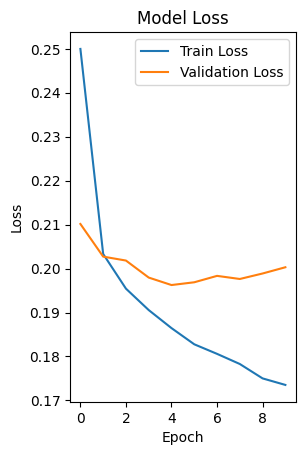

In [46]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


In [47]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [48]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.20029792189598083
Test Accuracy: 0.9099424481391907


234/234 [==============================] - 0s 1ms/step


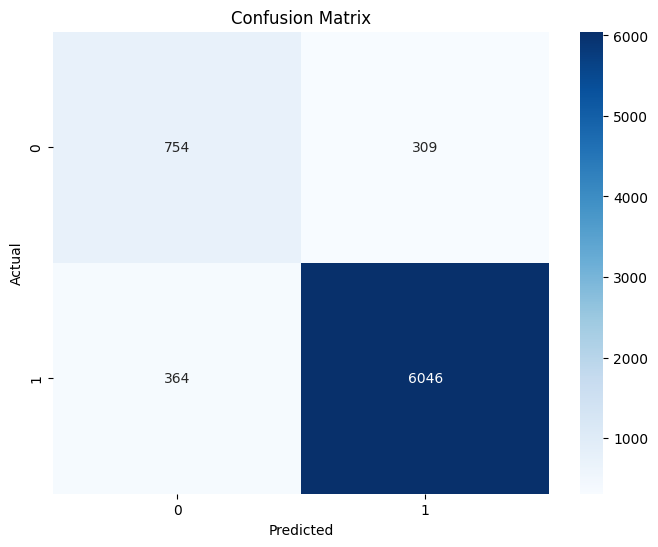

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1063
           1       0.95      0.94      0.95      6410

    accuracy                           0.91      7473
   macro avg       0.81      0.83      0.82      7473
weighted avg       0.91      0.91      0.91      7473



In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict on the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))
